In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn import set_config
set_config(display='diagram')

In [ ]:
# load the dataset, you can assume this data is already cleaned.
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR33clYD7L7KarKwDrJr1GzW7GQRbTIzITBBHA7J-luNwIJylRrQR74p_k6AHJE-OfI5y3L2KmFIWo7/pub?output=csv'
df = pd.read_csv(path)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
df.duplicated().sum()

5

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# the 'zipcode' column is a nominal categorical variable  
# convert the datatype of 'zipcode' to 'object'

df['zipcode'] = df['zipcode'].astype('object')

Split data into target vector and features matrix.

In [ ]:
# Drop the 'date' column
# assign X and y
#price is the target

X = df.drop(columns=['price'])
y = df['price']

### Train-Test-Split

This method allows us to validate how our model does on unseen data - which allows us to check for high variance.

In [ ]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Create a function to take the true and predicted labels and print MAE, MSE, RMSE, and R2 metrics

In [ ]:
# Create a function to take the true and predicted labels and print MAE, MSE, RMSE, and R2 metrics
def evaluate_model(y_true, y_pred):
  """takes two arrays, true labels and predicted labels, and prints
  MAE, MSE, RMSE, and R2 metrics"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)

  print(f'scores: MAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \
  \nR2: {r2:.2f}')

# ColumnTransformer

Create 

1. column selectors
2. one hot encoding transformer
3. and a ColumnTransformer object that will one-hot encode the categorical variables.

## tree is a clustering algorithm.  It is ALWAYS necessary to scale your data when using a clustering algorithm.

In [ ]:
# Create your preprocessing steps
# use make_column_selector, ColumnTransformer, and OneHotEncoder
# remember to set sparse=False for the OneHotEncoder
# remember to set remainder='passthrough' for the ColumnTransformer

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

ohe_tuple = (ohe, cat_selector)

transformer = make_column_transformer(ohe_tuple, remainder='passthrough')

In [ ]:
#Get out feature names from OneHotEncoder
transformer.fit(X_train)
final_cols = transformer.get_feature_names_out()

In [ ]:
final_cols[0]

'onehotencoder__zipcode_98001'

In [ ]:
final_cols[0].split('__')[-1]

'zipcode_98001'

In [ ]:
# Create a loop to split out feature names and append to a list
clean_names = []
for col in final_cols:
  name = col.split('__')[-1]
  clean_names.append(name)


## Baseline model

1. Instantiate DummyRegressor with the 'mean' strategy to get some baseline metrics.

2. Put your ColumnTransformer and baseline model into a pipeline.

3. Fit your pipeline on the training data and evaluate it on BOTH the training and the testing data using a metric of your choice.

In [ ]:
#instantiate baseling
dummy = DummyRegressor(strategy='mean')

#create pipeline
dummy_pipe = make_pipeline(transformer, dummy)
#fit pipeline
dummy_pipe.fit(X_train, y_train)
#create train and test predictions

#evaluate model
print('Training Scores for Baseline Model')

evaluate_model(y_train, dummy_pipe.predict(X_train))

print('\n')

print('Testing Scores for Baseline Model')

evaluate_model(y_test, dummy_pipe.predict(X_test))

Training Scores for Baseline Model
scores: MAE: 230,871.62 
MSE: 128,687,404,328.83 
RMSE: 358,730.27   
R2: 0.00


Testing Scores for Baseline Model
scores: MAE: 240,105.44 
MSE: 153,894,139,484.07 
RMSE: 392,293.44   
R2: -0.00


## High Bias
Fit a Decision Tree Regressor model to predict price that has very high bias by adjusting max_depth.

In [ ]:
bias_tree = DecisionTreeRegressor(max_depth=3)

bias_tree_pipe = make_pipeline(transformer, bias_tree)

bias_tree_pipe.fit(X_train, y_train)

print('Training Scores for High Bias Model')

evaluate_model(y_train, bias_tree_pipe.predict(X_train))

print('\n')

print('Testing Scores for High Bias Model')

evaluate_model(y_test, bias_tree_pipe.predict(X_test))

Training Scores for Baseline Model
scores: MAE: 135,818.44 
MSE: 50,452,757,454.28 
RMSE: 224,616.91   
R2: 0.61


Testing Scores for Baseline Model
scores: MAE: 141,067.32 
MSE: 61,268,559,566.18 
RMSE: 247,524.87   
R2: 0.60


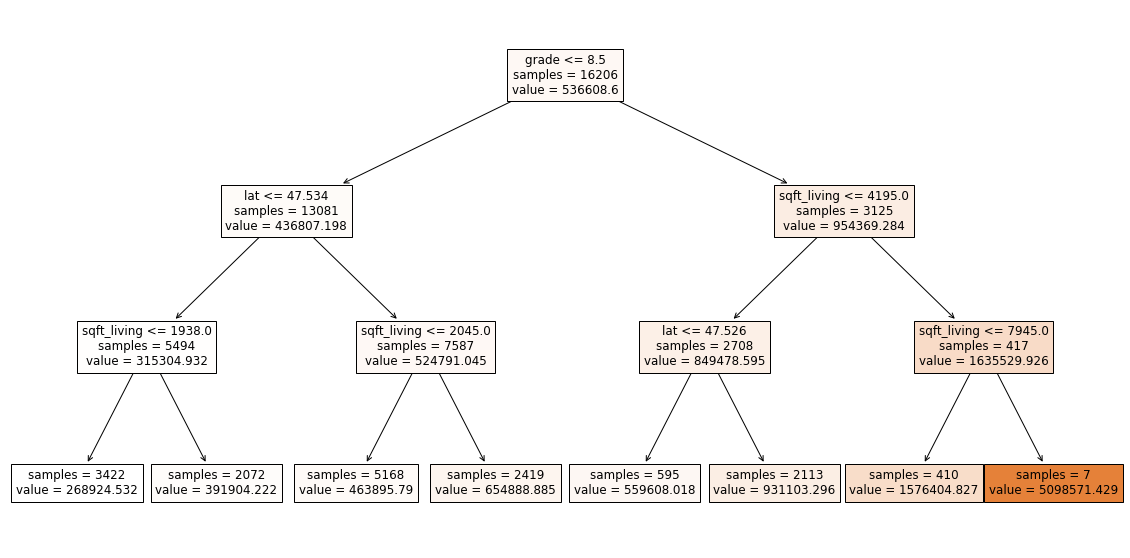

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(bias_tree, filled=True, feature_names = clean_names, impurity=False);

## High Variance
Now, fit a Decision Tree Regressor pipeline to predict price that has very high variance by adjusting max_depth.

In [ ]:
var_tree = DecisionTreeRegressor(max_depth=None)

var_tree_pipe = make_pipeline(transformer, var_tree)

var_tree_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Model')

evaluate_model(y_train, var_tree_pipe.predict(X_train))

print('\n')

print('Testing Scores for High Variance Model')

evaluate_model(y_test, var_tree_pipe.predict(X_test))

Training Scores for High Variance Model
scores: MAE: 838.99 
MSE: 81,504,264.16 
RMSE: 9,027.97   
R2: 1.00


Testing Scores for High Variance Model
scores: MAE: 104,129.93 
MSE: 41,152,309,640.18 
RMSE: 202,860.32   
R2: 0.73


In [ ]:
var_tree.get_depth()

37

## Balance

1. Choose a metric to optimize in order to decide which model is best.  In a comment, explain why you chose that metric.

2. Adjust the max depth to get the best model possible.  

Hint: You might try creating a loop over a reasonable number of max_depth values and storing lists of scores, then plotting those scores to visually determine the best value for the max_depth.

In [ ]:
# create a range of max_depth values
depths = range(1, var_tree.get_depth())

#create a dataframe to store train and test scores
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths
for n in depths:
  #fit a new model with max_depth
  tree = DecisionTreeRegressor(max_depth=n)

  #put the model in a pipeline
  tree_pipe = make_pipeline(transformer, tree)

  #fit the model
  tree_pipe.fit(X_train, y_train)

  #create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)

  #evaluate the model using the R2 score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  #store the scores in a data frame
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [ ]:
scores

,Train,Test
1,0.323987,0.311254
2,0.4981,0.500666
3,0.607943,0.601346
4,0.680456,0.637349
5,0.74521,0.714512
6,0.792862,0.738204
7,0.830139,0.763965
8,0.863309,0.752873
9,0.888744,0.764799
10,0.911059,0.794949


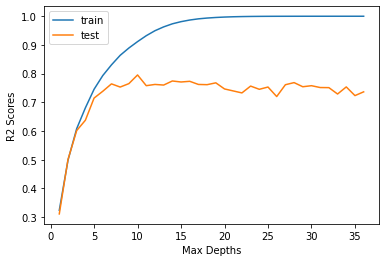

In [ ]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [ ]:
#sort the dataframe by test scores and save the index (k) of the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

10

In [ ]:
best_tree = DecisionTreeRegressor(max_depth=best_depth)

best_tree_pipe = make_pipeline(transformer, best_tree)

best_tree_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Model')

evaluate_model(y_train, best_tree_pipe.predict(X_train))

print('\n')

print('Testing Scores for High Variance Model')

evaluate_model(y_test, best_tree_pipe.predict(X_test))

Training Scores for High Variance Model
scores: MAE: 67,263.74 
MSE: 11,445,533,468.65 
RMSE: 106,983.80   
R2: 0.91


Testing Scores for High Variance Model
scores: MAE: 94,823.75 
MSE: 33,977,985,224.60 
RMSE: 184,331.18   
R2: 0.78


In [ ]:
#create a range of max_depth values
depths = range(1, 20, 2)

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths
for n in depths:
  #Trying depth. Printing depth = n
  #fit a new model with max_depth=n
  tree = RandomForestRegressor(max_depth=n, random_state=42)

  #put the model into a pipeline
  tree_pipe = make_pipeline(transformer, tree)
  
  #fit the model
  tree_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

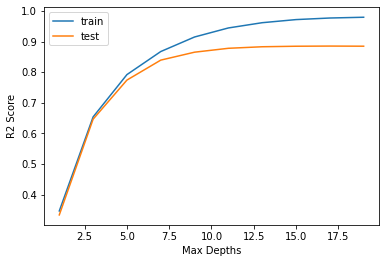

In [ ]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label='train')
plt.plot(depths, scores['Test'], label='test')
plt.ylabel('R2 Score')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [ ]:
#sort the dataframe by test scores and save the index (k) of the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

17

In [ ]:
#create and fit a final model using the best value for max_depth
best_tree = RandomForestRegressor(max_depth=best_depth, random_state=42)
best_tree_pipe = make_pipeline(transformer, best_tree)
best_tree_pipe.fit(X_train, y_train)

#evaluate the final model
print(f'Training Scores for Random Forest')
evaluate_model(y_train, best_tree_pipe.predict(X_train))

print('\n')

print(f'Testing Scores for Random Forest')
evaluate_model(y_test, best_tree_pipe.predict(X_test))

print('\n')

Training Scores for Random Forest
scores: MAE: 32,575.08 
MSE: 2,962,330,145.97 
RMSE: 54,427.29   
R2: 0.98


Testing Scores for Random Forest
scores: MAE: 71,714.33 
MSE: 17,614,768,864.81 
RMSE: 132,720.64   
R2: 0.89




In [ ]:
#create and fit a final model using the best value for max_depth
best_tree = RandomForestRegressor()
best_tree_pipe = make_pipeline(transformer, best_tree)
best_tree_pipe.fit(X_train, y_train)

#evaluate the final model
print(f'Training Scores for Random Forest')
evaluate_model(y_train, best_tree_pipe.predict(X_train))

print('\n')

print(f'Testing Scores for Random Forest')
evaluate_model(y_test, best_tree_pipe.predict(X_test))

print('\n')

Training Scores for Random Forest
scores: MAE: 26,201.68 
MSE: 2,445,213,227.77 
RMSE: 49,449.10   
R2: 0.98


Testing Scores for Random Forest
scores: MAE: 72,296.54 
MSE: 18,084,545,393.34 
RMSE: 134,478.79   
R2: 0.88


